# 💻 Lab 2 - Intro to Probabilistic Programming (Part 2 - PyMC basics)

# ❗❗❗ Very important administrative detail

The lab changes its content once every **TWO WEEKS**.

*   week 1 & week 2 - lab1
*   **week 3 & week 4 - lab2**
*   ...

# Bayesian Methods for Hackers
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/tree/master

- Book with PyMC applications and discussions
- Jupyter notebooks for each chapter

# **PyMC** - Python library for Probabilistic Programing

Open -  https://www.pymc.io/welcome.html

In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")


## "Hello, world!" in PyMC - Tossing a coin

We toss a coin and infer its bias. Let's consider the following basic bayesian model for a coin toss:

$p \sim Uniform(0, 1)$ - the **prior** distribution

$toss \sim Bernoulli(p)$ - the **likelihood** distribution





# Simulation vs. Inference

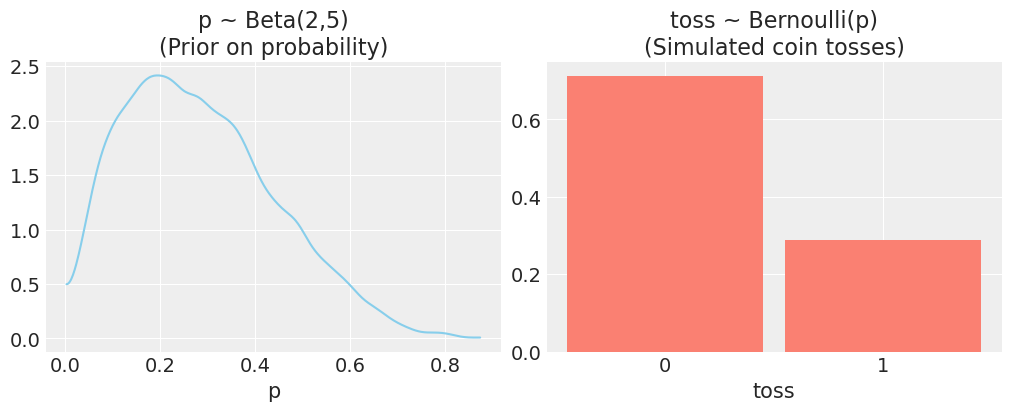

In [4]:
#setting probability towards head using Beta(2,5)
#for each p we do the Bernoulli test (H/T)
with pm.Model():
    p = pm.Beta('p', 2, 5)
    toss = pm.Bernoulli('toss', p=p)

#we pick 10.000 random of such pairs
draws = pm.draw([p, toss], draws=10000)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

az.plot_dist(draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('p ~ Beta(2,5)\n(Prior on probability)')
axes[0].set_xlabel('p')

az.plot_dist(draws[1], ax=axes[1], kind='hist', color='salmon')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated coin tosses)')
axes[1].set_xlabel('toss')

plt.show()

Sequential sampling (1 chains in 1 job)
NUTS: [p]
Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


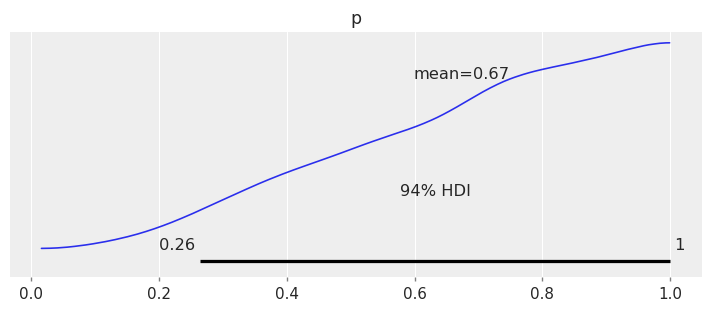

In [5]:
# The experiment of tossing a coin leads to Heads
toss_data = [1]

with pm.Model() as model_ex0:
    #prior
    #Uniform distribution gives no info, all biases equally possible
    p = pm.Uniform('p', lower=0, upper=1)

    #likelihood
    #associate each p with the result of the toss (H/T)
    #adding the observed toss
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # bayesian inference engine that samples from posterior
    # we will cover this in the next weeks
    #using the NUTS alg we check what p values are most likely to produce the observed data
    step = pm.NUTS()
    #we use 2000 samples from our p-values
    #more points for a val, more likely to be the one that produced the observed data
    trace = pm.sample(2000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
plt.show()
plt.close()

Sequential sampling (1 chains in 1 job)
NUTS: [p]
Sampling 1 chain for 1_000 tune and 20_000 draw iterations (1_000 + 20_000 draws total) took 3 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


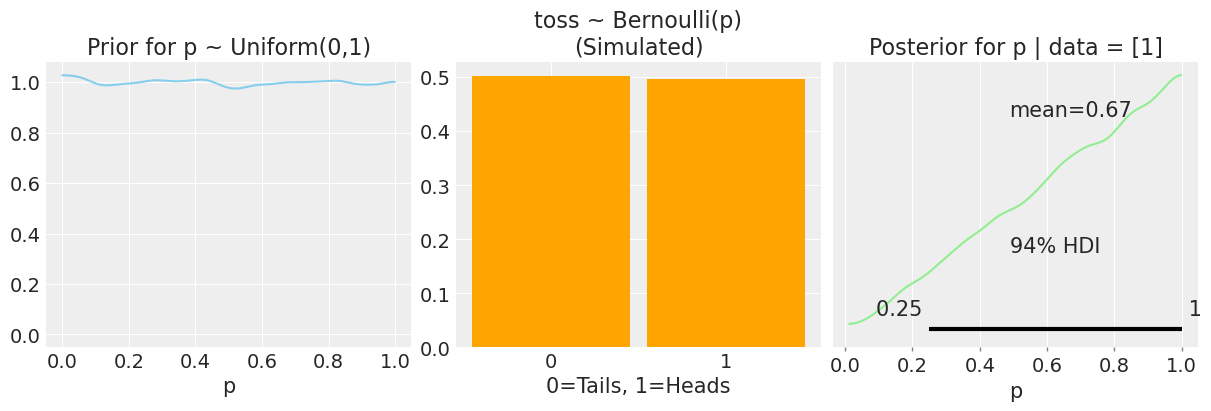

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Uniform('p', lower=0, upper=1)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Uniform(0,1)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
#it approximates the posterior values for p
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


Sequential sampling (1 chains in 1 job)
NUTS: [p]
Sampling 1 chain for 1_000 tune and 20_000 draw iterations (1_000 + 20_000 draws total) took 3 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


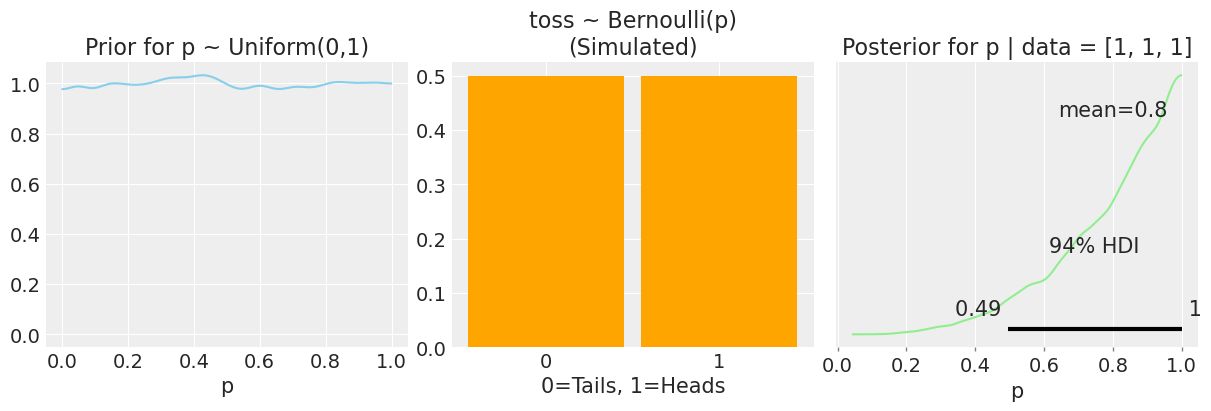

In [5]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Uniform('p', lower=0, upper=1)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Uniform(0,1)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


Sequential sampling (1 chains in 1 job)
NUTS: [p]
Sampling 1 chain for 1_000 tune and 20_000 draw iterations (1_000 + 20_000 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


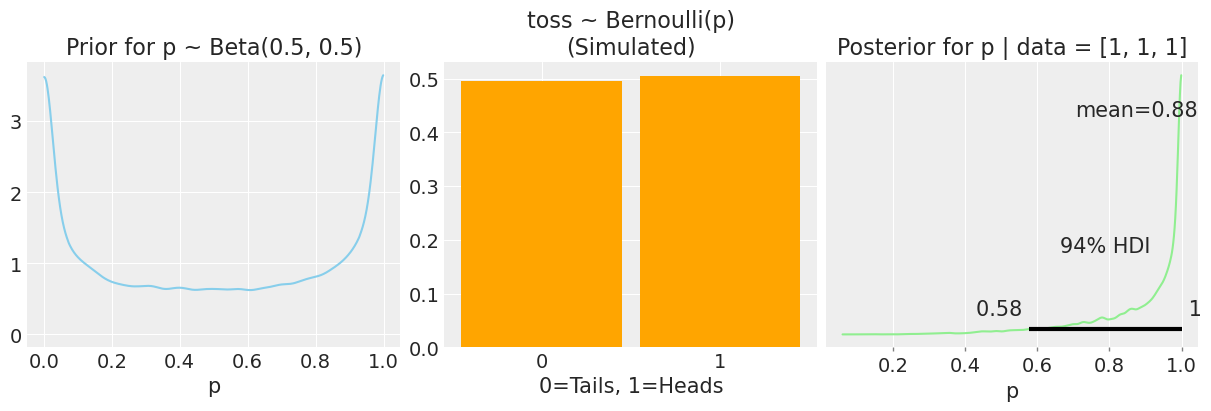

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    # beta(0.5,0.5) means the coin is very biased towards H or T
    p = pm.Beta('p', alpha=0.5, beta=0.5)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Beta(0.5, 0.5)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


Sequential sampling (1 chains in 1 job)
NUTS: [p]
Sampling 1 chain for 1_000 tune and 20_000 draw iterations (1_000 + 20_000 draws total) took 3 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


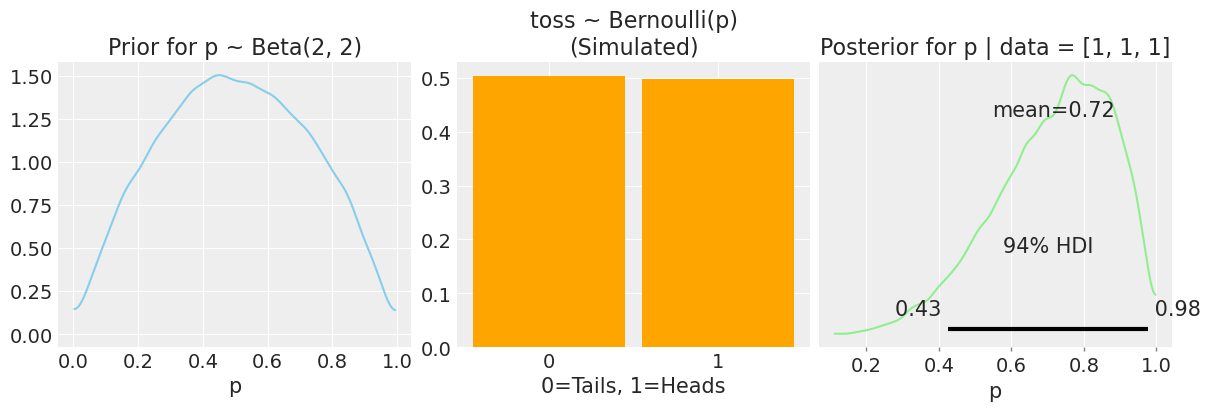

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    # using beta(2,2) we believe the coin is fair
    p = pm.Beta('p', alpha=2, beta=2)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Beta(2, 2)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


Let's use a sequence of throws. What is a proper likelihood distribution? We use a sequence of throws from a coin with true bias 0.25.

$p \sim Uniform(0, 1)$ - the **prior** distribution

$heads \sim Binomial(n, p)$ - the **likelihood** distribution

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


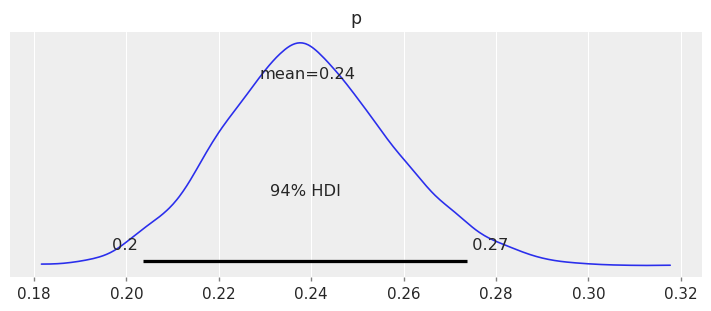

In [ ]:
toss_data = np.random.binomial(n=1, p=0.25, size=[500])

with pm.Model() as model_ex1:

    #prior
    p = pm.Uniform('p', lower=0, upper=1)

    #likelihood
    # modeling sum(toss_data) as Binomial(n=500, p) is exactly equivalent to modeling 500 individual Bernoullis — but much faster.
    heads = pm.Binomial('heads', n=len(toss_data), p=p, observed=sum(toss_data))

    # bayesian inference engine that samples from posterior
    # chains=2 → run two independent MCMC sequences 
    # each chain generates 2000 samples of p
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=2, progressbar=False)

az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
plt.show()
plt.close()

Let's run the same model on an increasing number of coin tosses.

Run the following examples and monitor the posterior.

Coin bayesian model for 2 tosses


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 8 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


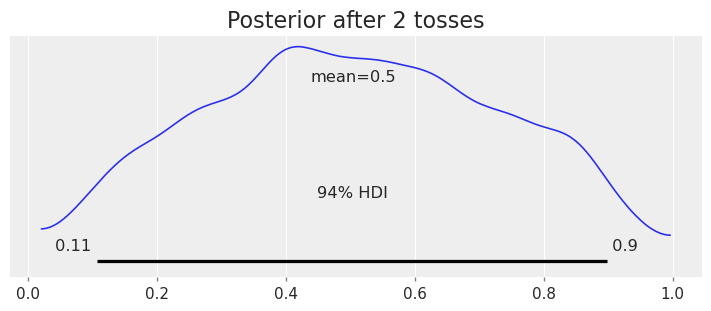

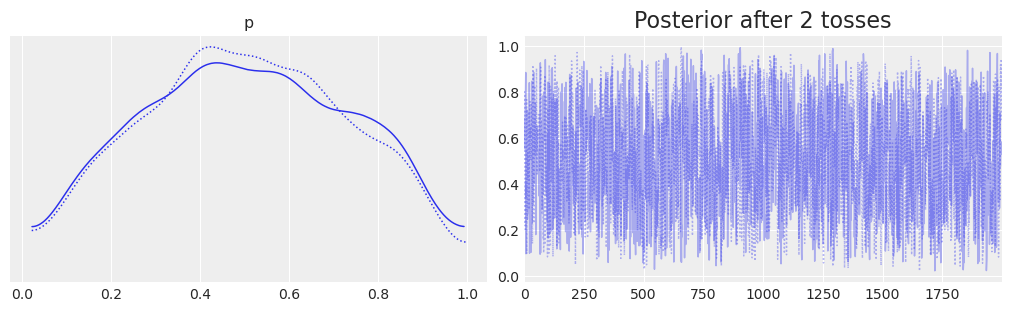

Coin bayesian model for 8 tosses


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


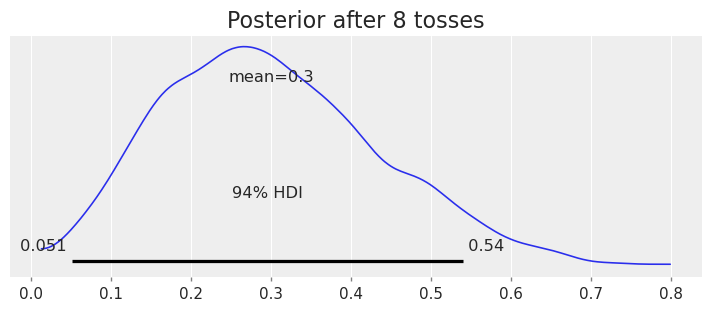

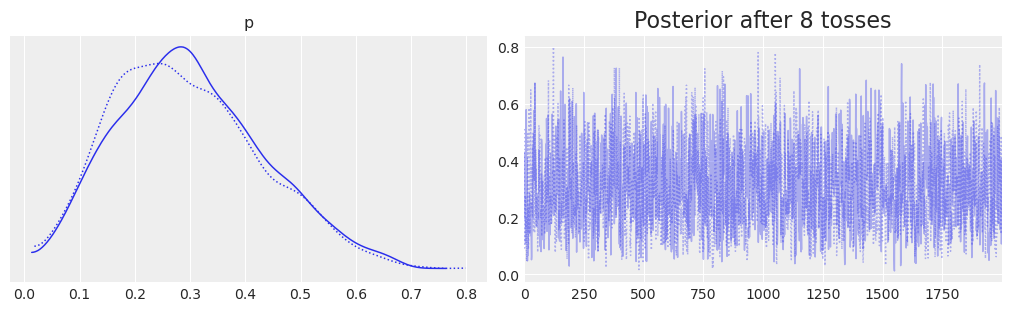

Coin bayesian model for 1000 tosses


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


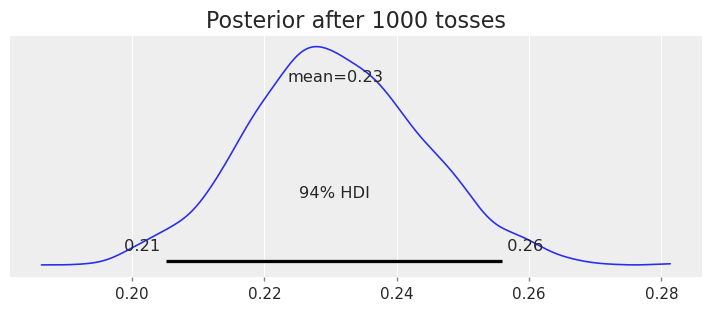

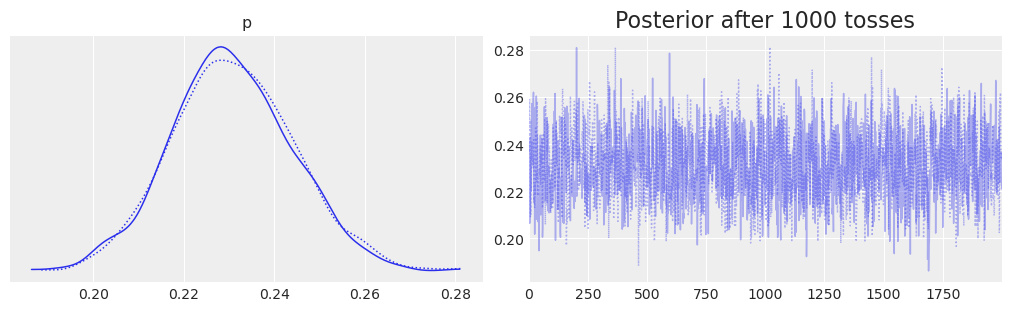

Coin bayesian model for 5000 tosses


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


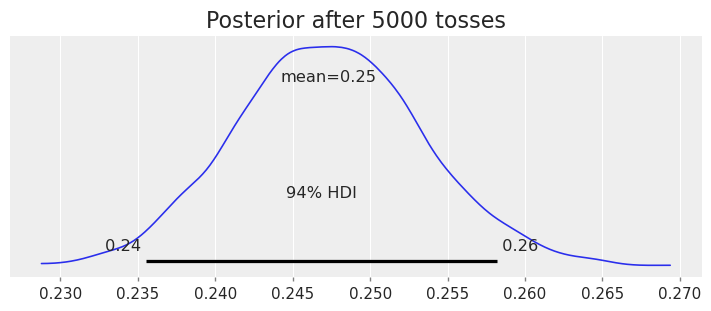

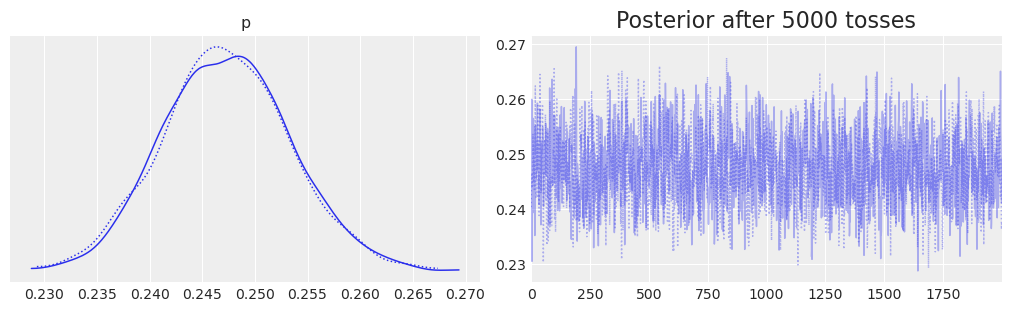

In [9]:
tosses = {
    0: [0, 1],
    1: [0, 1, 0, 0, 0, 0, 1, 0],
    2: np.random.binomial(n=1, p=0.25, size=[1000]),
    3: np.random.binomial(n=1, p=0.25, size=[5000])
}

for _, toss_data in tosses.items():

    print(f"Coin bayesian model for {len(toss_data)} tosses")

    with pm.Model() as model_ex2:
        # prior
        p = pm.Uniform('p', lower=0, upper=1)

        #likelihood
        # toss = pm.Bernoulli('toss', p=p, observed=toss_data) # can we also use this?
        heads = pm.Binomial('heads', n=len(toss_data), p=p, observed=sum(toss_data))

        # bayesian inference engine that samples from posterior
        step = pm.NUTS()
        trace = pm.sample(2000, step=step, chains=2, progressbar=False)


    az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
    plt.title(f"Posterior after {len(toss_data)} tosses")
    plt.show()
    plt.close()

    az.plot_trace(trace, var_names=['p'], figsize=(10, 3))
    plt.title(f"Posterior after {len(toss_data)} tosses")
    plt.show()
    plt.close()


# Exercise 1 - Find the bias of the coin

❗ Remember from the previous lab that since Beta(1,1) looks like Uniform(0,1), then we can use it as prior distribution.

$p \sim Beta(1, 1)$

$heads \sim Binomial(n, p)$

Upload the file *coin_tosses.npy* in the notebook, follow the examples above to make your own beta-binomial model, and name it my_betabin. Plot the posterior using arviz or matplotlib.

*Extra: PyMC also has a built-in BetaBinomial distribution. Read the documentation and check to see similar results to your own my_betabin model*

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


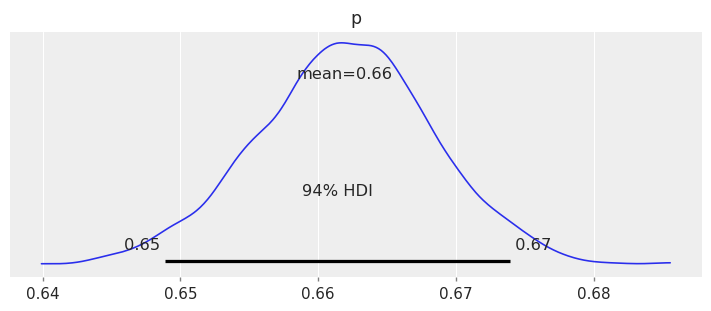

In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

# TODO 1: Load coin_tosses.npy into a NumPy array
coin_tosses=np.load("coin_tosses.npy")

# TODO 2: Create the PyMC model following the examples above
with pm.Model() as my_betabin:
    #prior
    p=pm.Beta('p',alpha=1, beta=1)

    #likelihood
    heads=pm.Binomial('heads', n=len(coin_tosses), p=p, observed=sum(coin_tosses))

    #bayesian inference
    step=pm.NUTS()
    trace=pm.sample(2000, step=step, chains=2, progressbar=False)



# TODO 3: Plot the posterior and report your findings
az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
plt.show()
plt.close()

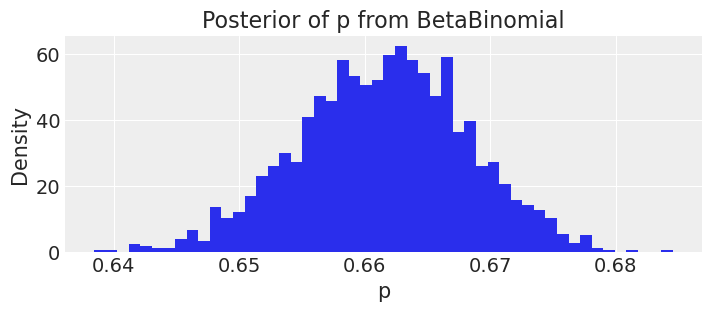

In [ ]:
n_heads=sum(coin_tosses)
n_tosses=len(coin_tosses)
with pm.Model() as beta_bin_model:
    # BetaBinomial likelihood
    heads = pm.BetaBinomial('heads', n=len(coin_tosses), alpha=1, beta=1, observed=sum(coin_tosses))

# BetaBinomial posterior is equivalent to Beta(alpha + k, beta + n - k)
# we can derive the conjugate posterior by using BetaBinomial
alpha_post = 1 + n_heads
beta_post = 1 + n_tosses - n_heads

# sample from posterior analytically
p_samples = np.random.beta(alpha_post, beta_post, size=2000)

# plot posterior for p
plt.figure(figsize=(7,3))
plt.hist(p_samples, bins=50, density=True)
plt.xlabel("p")
plt.ylabel("Density")
plt.title("Posterior of p from BetaBinomial")
plt.show()

# Exercise 2 - A/B Testing

Write a (complete) PyMC program to solve the following problem:
We have two website designs, called A and B. When a user lands on our website, we randomly show them design A or B, and record this assignment. After enough visitors have done this, we join this dataset against some metric of interest (typically, for websites, we are interested in a purchase or signup, call it conversion). For example, consider the following numbers:



```
visitors_to_A = 262
visitors_to_B = 127
conversions_from_A = 20
conversions_from_B = 13
```



What we are really interested in is the probability of conversion, given site A or B. As a business, we want this probability to be as high as possible. So, our goal is to determine which site, A or B, has a higher probability of conversion.

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_A, p_B]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 11 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
C:\Users\Antonia\AppData\Local\Temp\ipykernel_20236\3699824107.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


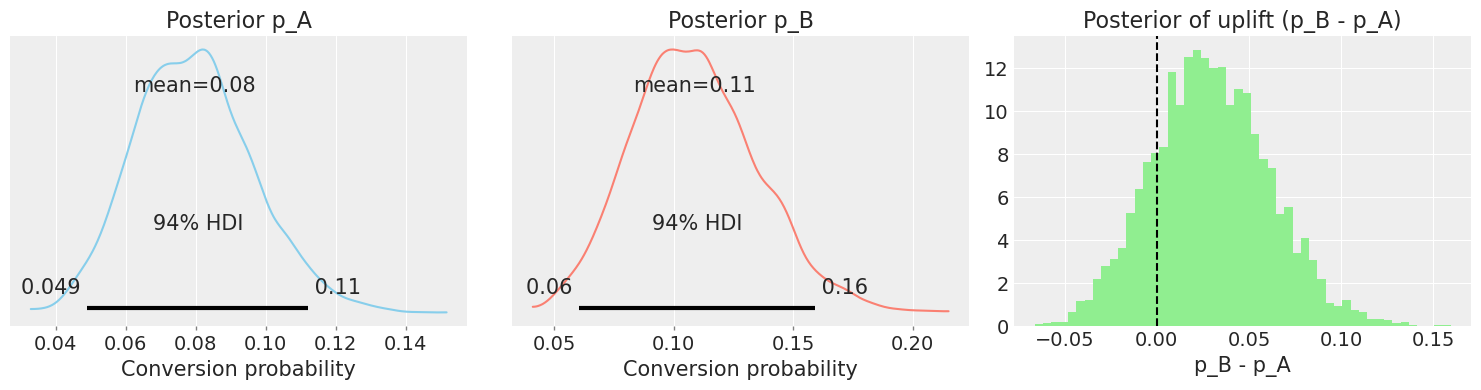

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
az.style.use("arviz-darkgrid")

visitors_to_A = 262
visitors_to_B = 127
conversions_from_A = 20
conversions_from_B = 13

with pm.Model() as ab_model:
    # prior
    p_A = pm.Uniform('p_A', lower=0, upper=1)
    p_B = pm.Uniform('p_B', lower=0, upper=1)

    # likelihood
    l_A = pm.Binomial("l_A", n=visitors_to_A, p=p_A, observed=conversions_from_A)
    l_B=pm.Binomial("l_B", n= visitors_to_B, p=p_B, observed=conversions_from_B)


    # bayesian inference engine that samples from posterior
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=2, progressbar=False)

# Extract posterior samples
pA_samples = trace.posterior['p_A'].stack(draws=("chain", "draw")).values
pB_samples = trace.posterior['p_B'].stack(draws=("chain", "draw")).values


# Compute uplift (difference between B and A)
uplift_samples = pB_samples - pA_samples

# Plot posterior distributions and uplift
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Posterior of p_A
az.plot_posterior(pA_samples, ax=axes[0], color='skyblue')
axes[0].set_title("Posterior p_A")
axes[0].set_xlabel("Conversion probability")

# Posterior of p_B
az.plot_posterior(pB_samples, ax=axes[1], color='salmon')
axes[1].set_title("Posterior p_B")
axes[1].set_xlabel("Conversion probability")

# Posterior of uplift (p_B - p_A)
axes[2].hist(uplift_samples, bins=50, density=True, color='lightgreen')
axes[2].axvline(0, color='k', linestyle='--')  # reference line at 0
axes[2].set_title("Posterior of uplift (p_B - p_A)")
axes[2].set_xlabel("p_B - p_A")

plt.tight_layout()
plt.show()


# Exercise 3 - Heights

In the array heights.npy you will find a dataset of recorded heights in cm. Plot a histogram of the heights and decide on the best distribution to model them. Write a PyMC program to model the heights, plot the posterior distribution, and estimate the posterior distribution of the population mean height.

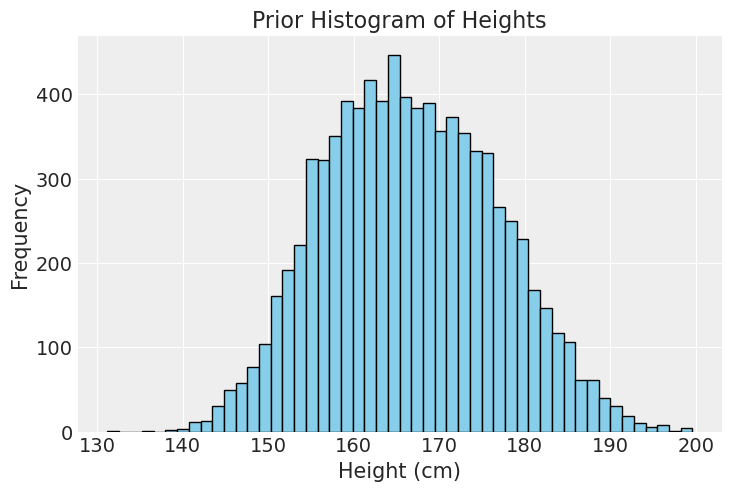

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, sigma]


c:\Users\Antonia\.conda\envs\python_env\lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [heights_val]


c:\Users\Antonia\.conda\envs\python_env\lib\site-packages\rich\live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

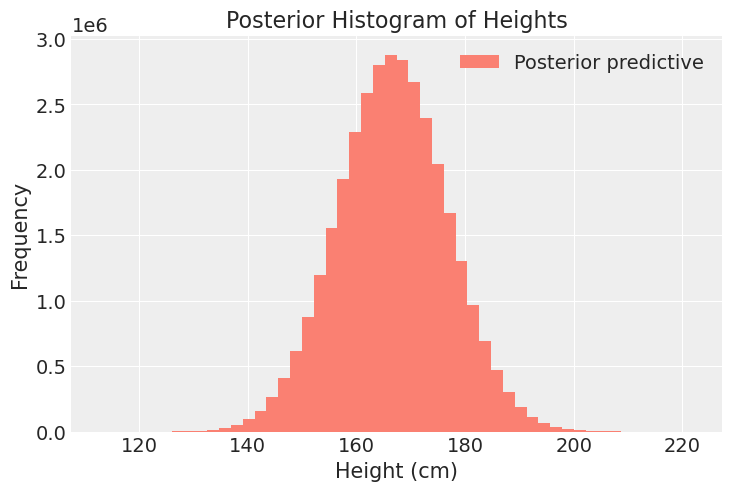

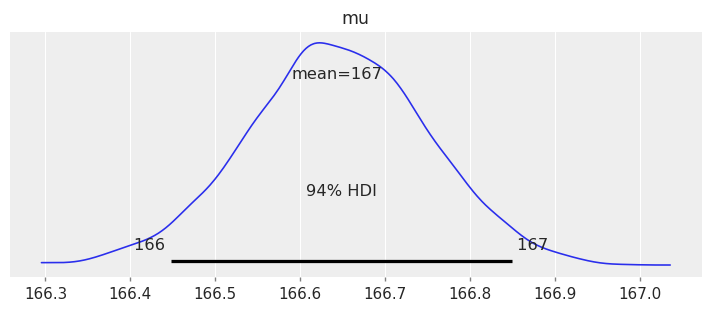

In [13]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

heights = np.load("heights.npy")

# Plot histogram of observed heights
plt.hist(heights, bins=50, color='skyblue', edgecolor='black')
plt.title("Prior Histogram of Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()

# PyMC model
with pm.Model() as heights_model:
    mu = pm.Normal("mu", mu=np.mean(heights), sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=2)
    heights_val = pm.Normal("heights_val", mu=mu, sigma=sigma, observed=heights)

    trace = pm.sample(2000, tune=1000, chains=2)
    posterior_pred = pm.sample_posterior_predictive(trace, var_names=["heights_val"])
    
    # Correct way to access posterior predictive samples
    simulated_heights = posterior_pred.posterior_predictive["heights_val"].values

# Plot posterior predictive
plt.hist(simulated_heights.flatten(), bins=50, color='salmon', label='Posterior predictive')
plt.title("Posterior Histogram of Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Posterior distribution of mu
az.plot_posterior(trace, var_names=['mu'], figsize=(7, 3))
plt.show()